## Dependencias 

In [45]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

from functools import reduce 
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

cf.go_offline()

## Datos sintéticos

In [2]:
def f(x,y):
    return np.sin(x**2)-(2*np.cos(y))**2-x**3

In [3]:
X = np.random.uniform(size=10000) 
Y = np.random.uniform(size=10000)
X.shape,Y.shape

((10000,), (10000,))

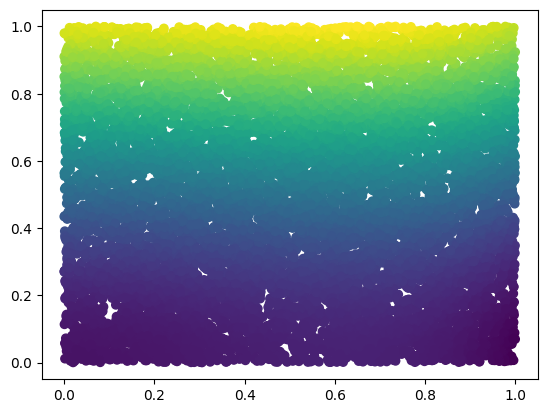

In [4]:
plt.scatter(X,Y,c=f(X,Y),cmap='viridis')

In [5]:
Z = np.vectorize(f)(X,Y)

(array([1463., 1781., 1097.,  932.,  876.,  810.,  818.,  816.,  767.,
         640.]),
 array([-4.15137845, -3.83947611, -3.52757376, -3.21567142, -2.90376907,
        -2.59186672, -2.27996438, -1.96806203, -1.65615969, -1.34425734,
        -1.032355  ]),
 <BarContainer object of 10 artists>)

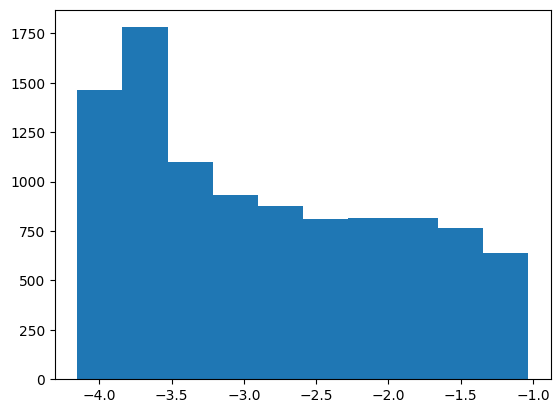

In [6]:
plt.hist(Z)

In [7]:
df = pd.DataFrame({'X':X,'Y':Y,'Z':Z})
df.shape

(10000, 3)

In [8]:
df.head()

,X,Y,Z
0,0.283640,0.674700,-2.381639
1,0.478671,0.032008,-3.878453
2,0.077837,0.926922,-1.435846
3,0.053525,0.956633,-1.325661
4,0.068095,0.595872,-2.735761


In [11]:
df.sample(300).iplot(kind='scatter3d',x='X',y='Y',z='Z',mode='markers',color='purple')

## Partición

In [12]:
Xt,Xv,Yt,Yv = train_test_split(df[['X','Y']],df['Z'],test_size=0.3)
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
Yt.reset_index(drop=True,inplace=True)
Yv.reset_index(drop=True,inplace=True)
Xt.shape,Xv.shape,Yt.shape,Yv.shape

((7000, 2), (3000, 2), (7000,), (3000,))

In [13]:
Xt.head()

,X,Y
0,0.777444,0.700732
1,0.817567,0.536051
2,0.966817,0.789658
3,0.333509,0.046932
4,0.603737,0.715378


## Aprendizaje

In [16]:
modelo = MLPRegressor()

In [52]:
help(modelo)

Help on MLPRegressor in module sklearn.neural_network._multilayer_perceptron object:

class MLPRegressor(sklearn.base.RegressorMixin, BaseMultilayerPerceptron)
 |  MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared error using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity',

### Espacio híperparamétrico

In [27]:
hp = {
    'hidden_layer_sizes': [(a,b,) for a in range(1,11) for b in range(1,11)],
    'activation': ['relu', 'tanh', 'logistic','identity']
}

In [28]:
reduce(lambda x,y:x*y,map(len,hp.values()))

400

### Selección de hiperparámetros

In [33]:
grid = RandomizedSearchCV(modelo,
                          param_distributions=hp,
                          n_iter=100,
                          cv=5,
                          scoring='neg_mean_absolute_error',
                          n_jobs=-1,
                          verbose=True)

In [34]:
grid.fit(Xt,Yt)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

RandomizedSearchCV(cv=5, estimator=MLPRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic', 'identity'],
                                        'hidden_layer_sizes': [(1, 1), (1, 2),
                                                               (1, 3), (1, 4),
                                                               (1, 5), (1, 6),
                                                               (1, 7), (1, 8),
                                                               (1, 9), (1, 10),
                                                               (2, 1), (2, 2),
                                                               (2, 3), (2, 4),
                                                               (2, 5), (2, 6),
                                                               (2, 7), (2, 8),
                                                               (2, 9), (2, 10),
                                                               (3, 1), (3, 2),
                                                               (3, 3), (3, 4),
                                                               (3, 5), (3, 6),
                                                               (3, 7), (3, 8),
                                                               (3, 9), (3, 10), ...]},
                   scoring='neg_mean_absolute_error', verbose=True)

In [35]:
grid.best_params_

{'hidden_layer_sizes': (1, 9), 'activation': 'tanh'}

In [36]:
grid.best_score_

-0.06112659292755938

In [37]:
modelo = grid.best_estimator_

In [38]:
modelo

MLPRegressor(activation='tanh', hidden_layer_sizes=(1, 9))

## Aprendizaje de parámetros $\theta$

In [39]:
modelo.fit(Xt,Yt)

MLPRegressor(activation='tanh', hidden_layer_sizes=(1, 9))

In [41]:
for c in modelo.coefs_:
    print(c.shape)

(2, 1)
(1, 9)
(9, 1)


<Axes: xlabel='Z', ylabel='Density'>

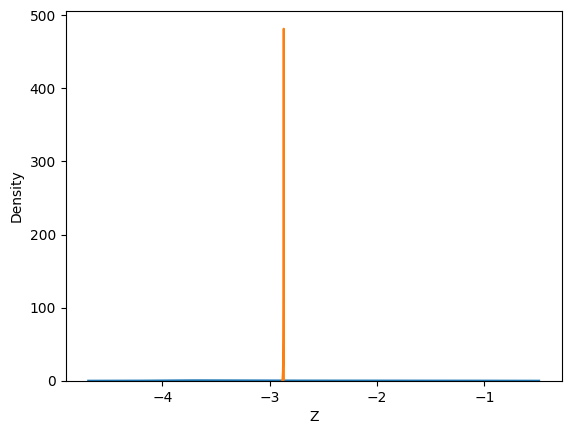

In [48]:
sns.kdeplot(Yv)
sns.kdeplot(modelo.predict(Xv))

In [49]:
pd.Series(modelo.predict(Xv)).describe()

count    3000.000000
mean       -2.870196
std         0.002051
min        -2.880457
25%        -2.870860
50%        -2.869265
75%        -2.868807
max        -2.868619
dtype: float64

In [51]:
Yv.describe()

count    3000.000000
mean       -2.835454
std         0.900883
min        -4.144577
25%        -3.681708
50%        -3.019880
75%        -2.053121
max        -1.035774
Name: Z, dtype: float64